### Loading dataset

In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/praksa_manu/reformatting_dataset/reformatted_stock_tweets.csv'

data = pd.read_csv(path)

data.head()

,Unnamed: 0,Date,Tweet,Stock Name,Company Name,Close
0,0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992
1,1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992
2,2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992
3,3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992
4,4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Pipeline for sentiment analysis


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

In [ ]:
# sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


data['Predictions'] = data['Tweet'].apply(lambda tweet: sentiment_pipeline(tweet)[0]['label'])

path = '/content/drive/MyDrive/praksa_manu/predicted.csv'
data.to_csv(path, index=False)
data.head()



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


,Date,Tweet,Stock Name,Company Name,Close,Predictions
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992,neutral
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992,neutral
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992,neutral
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992,neutral
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992,neutral


### Inspecting the results


In [1]:
import pandas as pd

In [3]:
path = '/content/drive/MyDrive/praksa_manu/predicted.csv'

data = pd.read_csv(path)

data.head(10)

,Date,Tweet,Stock Name,Company Name,Close,Predictions
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992,neutral
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992,neutral
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992,neutral
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992,neutral
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992,neutral
5,9/29/2022,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",268.209992,neutral
6,9/29/2022,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",268.209992,neutral
7,9/29/2022,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",268.209992,positive
8,9/29/2022,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",268.209992,neutral
9,9/29/2022,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",268.209992,neutral


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-7-967eb1baf75c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


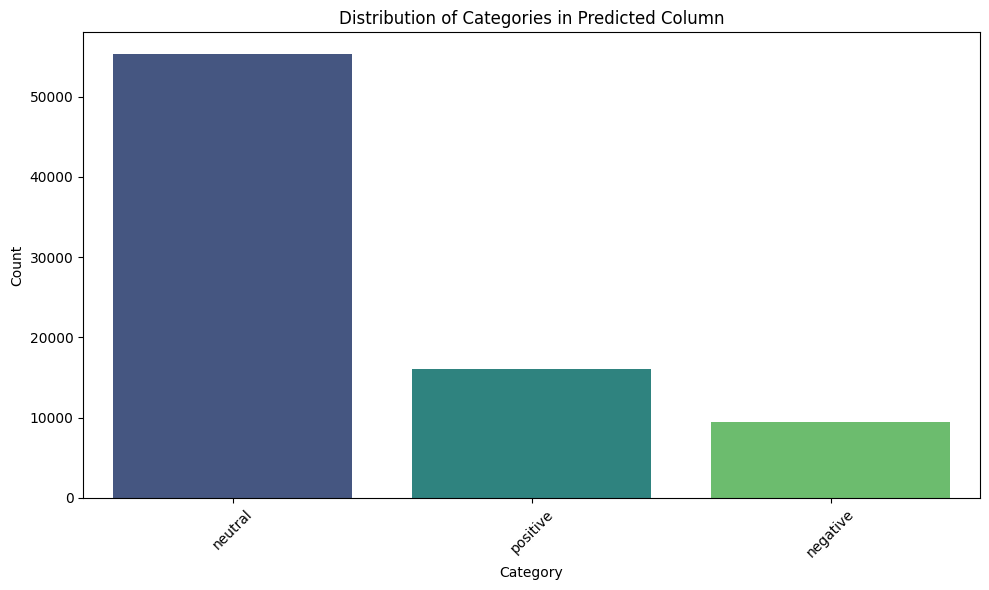

In [7]:
category_counts = data['Predictions'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categories in Predicted Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()